In [840]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## First we load dataframes

In [770]:
Game_table = pd.read_csv('Lego_Trust.csv')
Users      = pd.read_csv('Users.csv')

In [716]:
# Game_table.drop(columns=['Unnamed: 11','Unnamed: 12'],inplace=True)
# Game_table.to_csv('Lego_Trust.csv',index=False)

## Take a look at Game_tabel dataframe

In [771]:
Game_table.head()

,geme_step,relation_degree,P_id_0,P_move_0,P_tend_0,P_id_1,P_move_1,P_tend_1
0,10,1,0,CCCTTTCTCC,1,1,TTCTTTTCTT,0
1,10,1,2,CCTTTCCCTC,0,3,CCTCTTTCTC,0
2,10,1,4,TTTCTCTTCT,1,5,TTCTTTTTTT,1
3,10,1,4,CTCTCTCCTC,1,5,TCCCTTTTT,1
4,6,3,0,CTCTTT,1,4,TCTTTT,1


In [772]:
Users.head()

### parent(F_M) : witch parents alive ?
###        F : father
###          M : mother

,age,gender,job,parent(F_M)
0,9,M,NaN,11
1,25,M,student,11
2,30,M,self employed,10
3,31,M,housewife,0
4,10,M,NaN,11


#  

# Preprocessing Steps :

#  

## We mearge game_table dataframe with 2 players of each game 

In [773]:
Game_table = pd.merge(Game_table, Users, left_on='P_id_0', right_on=Users.index)

Game_table = pd.merge(Game_table, Users, left_on='P_id_1',suffixes=('_0', '_1'), right_on=Users.index)

Game_table.head()

,geme_step,relation_degree,P_id_0,P_move_0,P_tend_0,P_id_1,P_move_1,P_tend_1,age_0,gender_0,job_0,parent(F_M)_0,age_1,gender_1,job_1,parent(F_M)_1
0,10,1,0,CCCTTTCTCC,1,1,TTCTTTTCTT,0,9,M,NaN,11,25,M,student,11
1,6,3,0,CTCTTT,1,4,TCTTTT,1,9,M,NaN,11,10,M,NaN,11
2,10,1,2,CCTTTCCCTC,0,3,CCTCTTTCTC,0,30,M,self employed,10,31,M,housewife,0
3,10,1,4,TTTCTCTTCT,1,5,TTCTTTTTTT,1,10,M,NaN,11,11,F,NaN,11
4,10,1,4,CTCTCTCCTC,1,5,TCCCTTTTT,1,10,M,NaN,11,11,F,NaN,11


## Cleaning noise data and drop from dataset

In [774]:
noise_indexes = []
for row in range(Game_table.shape[0]):
    if(Game_table.geme_step[row]==len(Game_table.P_move_0[row])==len(Game_table.P_move_1[row])): pass
    else: noise_indexes.append(row)

noise_indexes

[4, 51, 60, 82, 93, 94, 98, 100, 110, 115, 129]

In [775]:
clear_Game_table = Game_table.copy()
for row in noise_indexes:
    clear_Game_table.drop(row,inplace=True)
    
clear_Game_table.reset_index(drop=True,inplace=True)
clear_Game_table.head()

,geme_step,relation_degree,P_id_0,P_move_0,P_tend_0,P_id_1,P_move_1,P_tend_1,age_0,gender_0,job_0,parent(F_M)_0,age_1,gender_1,job_1,parent(F_M)_1
0,10,1,0,CCCTTTCTCC,1,1,TTCTTTTCTT,0,9,M,NaN,11,25,M,student,11
1,6,3,0,CTCTTT,1,4,TCTTTT,1,9,M,NaN,11,10,M,NaN,11
2,10,1,2,CCTTTCCCTC,0,3,CCTCTTTCTC,0,30,M,self employed,10,31,M,housewife,0
3,10,1,4,TTTCTCTTCT,1,5,TTCTTTTTTT,1,10,M,NaN,11,11,F,NaN,11
4,8,0,7,TTCCTCCC,0,8,TCCCTCCC,0,27,M,NaN,11,27,M,NaN,11


## In this step we calc. players score and the trust rate
- Player score refer to the score of each player by the game rule that attached at the end of this file
- Trust rate is trust ply /all ply for each player

In [776]:
P0_scores = []
P1_scores = []
P0_Trust_rate = []
P1_Trust_rate = []

for row in range(clear_Game_table.shape[0]):
    P0_Trust_rate.append(round(clear_Game_table.P_move_0[row].count('T')/len(clear_Game_table.P_move_0[row]),2))
    P1_Trust_rate.append(round(clear_Game_table.P_move_1[row].count('T')/len(clear_Game_table.P_move_1[row]),2))
    p0_local = 0
    p1_local = 0
    for step in range(len(clear_Game_table.P_move_0[row])):
        if(clear_Game_table.P_move_0[row][step]==clear_Game_table.P_move_1[row][step]=='C'): pass
        elif(clear_Game_table.P_move_0[row][step]=='C' and clear_Game_table.P_move_1[row][step]=='T'): p0_local+=3 ;  p1_local-=1
        elif(clear_Game_table.P_move_0[row][step]=='T' and clear_Game_table.P_move_1[row][step]=='C'): p0_local-=1 ;  p1_local+=3
        elif(clear_Game_table.P_move_0[row][step]==clear_Game_table.P_move_1[row][step]=='T'):         p0_local+=2 ;  p1_local+=2
    P0_scores.append(p0_local)
    P1_scores.append(p1_local)
    
# Game_table.insert(6,'P0_score', P0_score)
# Game_table.insert(11,'P1_score', P1_score)

clear_Game_table['P_score_0'] = P0_scores
clear_Game_table['P_score_1'] = P1_scores

clear_Game_table['P_Trust_rate_0'] = P0_Trust_rate
clear_Game_table['P_Trust_rate_1'] = P1_Trust_rate

## Gain trust mean the first ply is tust or not ??

In [777]:
clear_Game_table['Gain_Trust_0'] = clear_Game_table.P_move_0.astype(str).str[0]
clear_Game_table['Gain_Trust_1'] = clear_Game_table.P_move_1.astype(str).str[0]


## Change the relation degree from numeric to meaningfull string

In [778]:
clear_Game_table.relation_degree.replace({0: 'unknown', 1: 'family',2:'known',3:'far communication & etc.'} , inplace=True)

## Reorder the game_table dataset columns

In [779]:
clear_Game_table =clear_Game_table[['geme_step', 'relation_degree','P_id_0','Gain_Trust_0', 'P_move_0','P_score_0','P_Trust_rate_0', 'P_tend_0','age_0', 'gender_0', 'parent(F_M)_0','job_0','P_id_1','Gain_Trust_1','P_move_1','P_score_1','P_Trust_rate_1', 'P_tend_1',  'age_1', 'gender_1', 'parent(F_M)_1', 'job_1']]
clear_Game_table.head()

,geme_step,relation_degree,P_id_0,Gain_Trust_0,P_move_0,P_score_0,P_Trust_rate_0,P_tend_0,age_0,gender_0,...,P_id_1,Gain_Trust_1,P_move_1,P_score_1,P_Trust_rate_1,P_tend_1,age_1,gender_1,parent(F_M)_1,job_1
0,10,family,0,C,CCCTTTCTCC,20,0.40,1,9,M,...,1,T,TTCTTTTCTT,4,0.80,0,25,M,11,student
1,6,far communication & etc.,0,C,CTCTTT,11,0.67,1,9,M,...,4,T,TCTTTT,7,0.83,1,10,M,11,NaN
2,10,family,2,C,CCTTTCCCTC,11,0.40,0,30,M,...,3,C,CCTCTTTCTC,7,0.50,0,31,M,0,housewife
3,10,family,4,T,TTTCTCTTCT,20,0.70,1,10,M,...,5,T,TTCTTTTTTT,12,0.90,1,11,F,11,NaN
4,8,unknown,7,T,TTCCTCCC,3,0.38,0,27,M,...,8,T,TCCCTCCC,7,0.25,0,27,M,11,NaN


## Sort dataset rows by younger ages player  
- age_0 must  have fewer age than age_1

In [780]:
reorderd_indexes = []

for i in range(clear_Game_table.shape[0]):
    if(clear_Game_table['age_0'][i] > clear_Game_table['age_1'][i]):
        reorderd_indexes.append(i)
        
        clear_Game_table.loc[i, 'P_id_0'],clear_Game_table.loc[i, 'P_id_1'] = clear_Game_table.loc[i, 'P_id_1'],clear_Game_table.loc[i, 'P_id_0']
        clear_Game_table.loc[i, 'Gain_Trust_0'],clear_Game_table.loc[i, 'Gain_Trust_1'] = clear_Game_table.loc[i, 'Gain_Trust_1'],clear_Game_table.loc[i, 'Gain_Trust_0']
        clear_Game_table.loc[i, 'P_move_0'],clear_Game_table.loc[i, 'P_move_1'] = clear_Game_table.loc[i, 'P_move_1'],clear_Game_table.loc[i, 'P_move_0']
        clear_Game_table.loc[i, 'P_score_0'],clear_Game_table.loc[i, 'P_score_1'] = clear_Game_table.loc[i, 'P_score_1'],clear_Game_table.loc[i, 'P_score_0']
        clear_Game_table.loc[i, 'P_Trust_rate_0'],clear_Game_table.loc[i, 'P_Trust_rate_1'] = clear_Game_table.loc[i, 'P_Trust_rate_1'],clear_Game_table.loc[i, 'P_Trust_rate_0']
        clear_Game_table.loc[i, 'P_tend_0'],clear_Game_table.loc[i, 'P_tend_1'] = clear_Game_table.loc[i, 'P_tend_1'],clear_Game_table.loc[i, 'P_tend_0']
        clear_Game_table.loc[i, 'age_0'],clear_Game_table.loc[i, 'age_1'] = clear_Game_table.loc[i, 'age_1'],clear_Game_table.loc[i, 'age_0']
        clear_Game_table.loc[i, 'gender_0'],clear_Game_table.loc[i, 'gender_1'] = clear_Game_table.loc[i, 'gender_1'],clear_Game_table.loc[i, 'gender_0']
        clear_Game_table.loc[i, 'parent(F_M)_0'],clear_Game_table.loc[i, 'parent(F_M)_1'] = clear_Game_table.loc[i, 'parent(F_M)_1'],clear_Game_table.loc[i, 'parent(F_M)_0']
        clear_Game_table.loc[i, 'job_0'],clear_Game_table.loc[i, 'job_0'] = clear_Game_table.loc[i, 'job_0'],clear_Game_table.loc[i, 'job_0']

In [781]:
print(f'reorderd rows index : {reorderd_indexes}')

reorderd rows index : [71, 72, 73, 74, 75, 76, 82, 83, 88, 89, 93, 113]


## clarify 3 seperate dataset by age range

In [782]:
first_kid = clear_Game_table.loc[(clear_Game_table.age_0 <20)]
second_mature = clear_Game_table.loc[(clear_Game_table.age_1 >20)]
kid_mature = clear_Game_table.loc[(clear_Game_table.age_0 <20) & (clear_Game_table.age_1 > 20)]
kids = clear_Game_table.loc[(clear_Game_table.age_0 <20) & (clear_Game_table.age_1 < 20)]
matures = clear_Game_table.loc[(clear_Game_table.age_0 >20) & (clear_Game_table.age_1 > 20)]

## Stranger players mean anyone else than family

In [783]:
strangers = clear_Game_table[clear_Game_table.relation_degree!='family']

## Plot trust rate per age distance seperated by 10 years gap distance

In [784]:
clear_Game_table['diff_age'] = round(abs(clear_Game_table.age_0-clear_Game_table.age_1)/n)
mean__trust_rate = clear_Game_table.groupby(clear_Game_table.diff_age).mean()

In [785]:
tr0 = mean__trust_rate.P_Trust_rate_0.copy()
tr1 = mean__trust_rate.P_Trust_rate_1.copy()
tr0[0] = (mean__trust_rate.P_Trust_rate_0.iloc[0]+mean__trust_rate.P_Trust_rate_1.iloc[0])/2
tr1[0] = (mean__trust_rate.P_Trust_rate_0.iloc[0]+mean__trust_rate.P_Trust_rate_1.iloc[0])/2

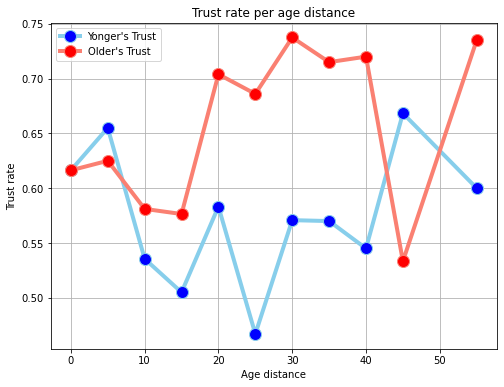

In [786]:
# age_distance = np.abs(clear_Game_table.age_0-clear_Game_table.age_1)
# age_distance = ['<10','10~20','20~30','30~40','40~50','50<']

plt.figure(figsize=(8,6))

n = 5

plt.plot(mean__trust_rate.index*n,tr0,markerfacecolor='blue',color='skyblue', marker='o',markersize=12, linewidth=4, label="Yonger's Trust")
plt.plot(mean__trust_rate.index*n,tr1,markerfacecolor='red',color='salmon', marker='o',markersize=12, linewidth=4, label="Older's Trust")
plt.grid(True)
plt.legend()
plt.title('Trust rate per age distance')
plt.xlabel('Age distance')
plt.ylabel('Trust rate')
# plt.ylim(0,1)

plt.savefig('line_plot.png', dpi=400);

## The correlation between columns !

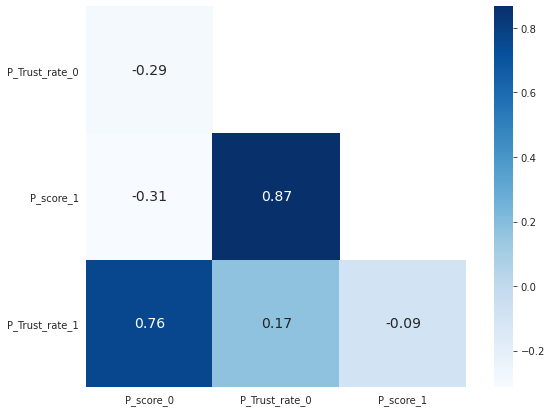

In [787]:
corelation = clear_Game_table[['P_score_0','P_Trust_rate_0','P_score_1','P_Trust_rate_1']].corr().iloc[1:,:3]

# corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corelation)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    ax = plt.subplots(figsize=(10, 7))
    ax = sns.heatmap(corelation, mask=mask,annot=True,cmap='Blues', square=True,annot_kws={"size": 14})
    plt.yticks(rotation=0) 
    figure = ax.get_figure()    
    figure.savefig('heat_map.png', dpi=400)

In [788]:
# clear_Game_table.corr()
corelation

,P_score_0,P_Trust_rate_0,P_score_1
P_Trust_rate_0,-0.289273,1.000000,0.866351
P_score_1,-0.312293,0.866351,1.000000
P_Trust_rate_1,0.763750,0.173927,-0.089738


# T_Test

In [789]:
# clear_Game_table[['gender_0','P_Trust_rate_0']]
ttest0 = clear_Game_table[['gender_0','P_Trust_rate_0']].rename(columns={"gender_0": "gender", "P_Trust_rate_0": "P_Trust_rate"})
ttest1 = clear_Game_table[['gender_1','P_Trust_rate_1']].rename(columns={"gender_1": "gender", "P_Trust_rate_1": "P_Trust_rate"})
ttest = pd.concat([ttest0, ttest1])

In [815]:
test_female = ttest[ttest['gender']=='F']
test_male = ttest[ttest['gender']=='M']
mini = min(test_male.shape[0],test_female.shape[0])
print(f'minimum size between man & weman is : {mini}')

minimum size between man & weman is : 115


In [816]:
# import researchpy as rp
from scipy.stats import ttest_ind
ttest_ind(test_female['P_Trust_rate'].iloc[:mini], test_male['P_Trust_rate'].iloc[:mini])

Ttest_indResult(statistic=3.05360195504741, pvalue=0.002529812655355814)

# histogram

In [826]:
hist_0 = matures[['age_0','gender_0','P_Trust_rate_0']].rename(columns={"age_0":"age","gender_0": "gender", "P_Trust_rate_0": "P_Trust_rate"})
hist_1 = matures[['age_1','gender_1','P_Trust_rate_1']].rename(columns={"age_1":"age","gender_1": "gender", "P_Trust_rate_1": "P_Trust_rate"})
hist = pd.concat([hist_0, hist_1])

In [865]:
# hist.sorted_value(hist["age"])
man = hist[hist["gender"]=="M"].sort_values(by=['age'])
weman = hist[hist["gender"]=="F"].sort_values(by=['age'])

(array([ 6., 10.,  4.,  2.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([21. , 25.9, 30.8, 35.7, 40.6, 45.5, 50.4, 55.3, 60.2, 65.1, 70. ]),
 <a list of 10 Patch objects>)

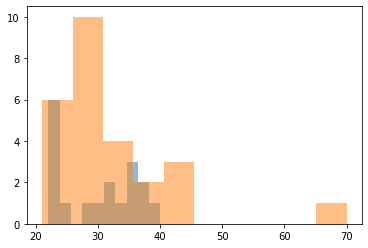

In [871]:
# sns.displot(hist,y="P_Trust_rate", x="age", hue="gender")
plt.hist(weman['age'],alpha=0.5)
plt.hist(man['age'],alpha=0.5)

fig , ax = plt.subplots(figsize=(10,5))

sns.violinplot(ax=ax,x=(kid_all.age),y=(kid_all.P_Trust_rate),scale='count')
plt.title('trust rate of a kid to kids by age')
plt.xlabel('Age')
plt.ylabel('Trust rate')
plt.savefig('trust rate of a kid to kids by age.png', dpi=400);

# Gain Trust of unknowns barplot

In [791]:
unknowns = clear_Game_table[clear_Game_table.relation_degree=='unknown']

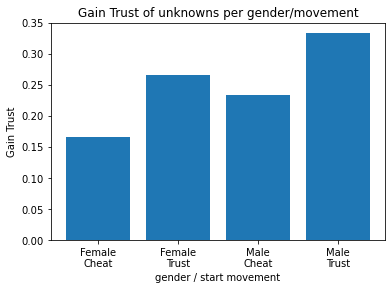

In [689]:
bar = unknowns.groupby([unknowns.gender_0,unknowns.Gain_Trust_0]).size() / unknowns.shape[0]


plt.bar(['Female\nCheat','Female\nTrust','Male\nCheat','Male\nTrust'],bar)

plt.title('Gain Trust of unknowns per gender/movement')
plt.xlabel('gender / start movement')
plt.ylabel('Gain Trust')

plt.savefig('bar1_plot.png', dpi=300 ,bbox_inches='tight');

# Violin plot by age datasets

###  Trust rate of kids to other kids by age range

In [690]:
kid0= kids[['age_0','P_Trust_rate_0']].rename(columns={"age_0": "age", "P_Trust_rate_0": "P_Trust_rate"})
kid1= kids[['age_1','P_Trust_rate_1']].rename(columns={"age_1": "age", "P_Trust_rate_1": "P_Trust_rate"})
kid_all = pd.concat([kid0, kid1])

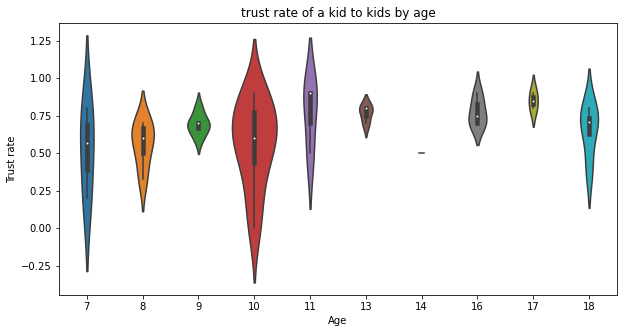

In [691]:
fig , ax = plt.subplots(figsize=(10,5))

sns.violinplot(ax=ax,x=(kid_all.age),y=(kid_all.P_Trust_rate),scale='count')
plt.title('trust rate of a kid to kids by age')
plt.xlabel('Age')
plt.ylabel('Trust rate')
plt.savefig('trust rate of a kid to kids by age.png', dpi=400);

### Trust rate of kids to others 

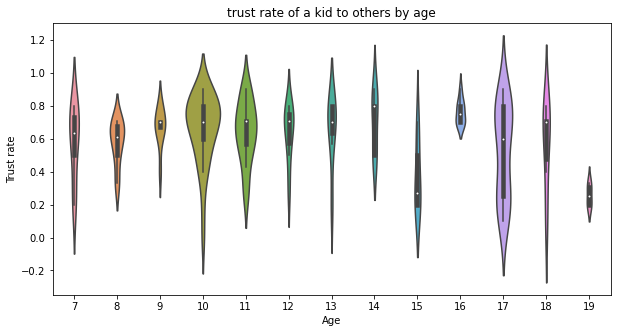

In [692]:
kid2 = first_kid[['age_0','P_Trust_rate_0']].rename(columns={"age_0": "age", "P_Trust_rate_0": "P_Trust_rate"})
one_player_kid = pd.concat([kid_all, kid2])

fig , ax = plt.subplots(figsize=(10,5))

sns.violinplot(ax=ax,x=(one_player_kid.age),y=(one_player_kid.P_Trust_rate),scale='count')
plt.title('trust rate of a kid to others by age')
plt.xlabel('Age')
plt.ylabel('Trust rate');

### trust rate of matures to other matures

In [693]:
mat0= matures[['age_0','P_Trust_rate_0']].rename(columns={"age_0": "age", "P_Trust_rate_0": "P_Trust_rate"})
mat1= matures[['age_1','P_Trust_rate_1']].rename(columns={"age_1": "age", "P_Trust_rate_1": "P_Trust_rate"})
mat = pd.concat([mat0, mat1])

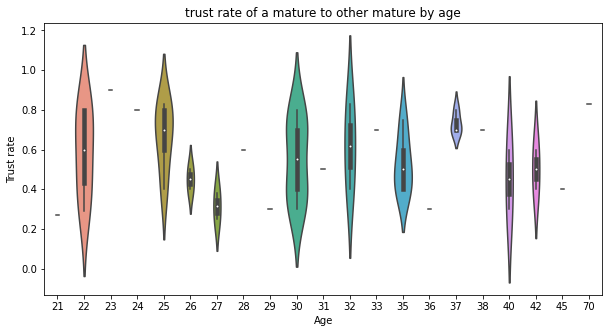

In [694]:
fig , ax = plt.subplots(figsize=(10,5))
sns.violinplot(ax=ax,x=(mat.age),y=(mat.P_Trust_rate),scale='count')

plt.title('trust rate of a mature to other mature by age')
plt.xlabel('Age')
plt.ylabel('Trust rate');

### trust rate between a  mature and a kid

##### trust rate of  a  kid to  matures

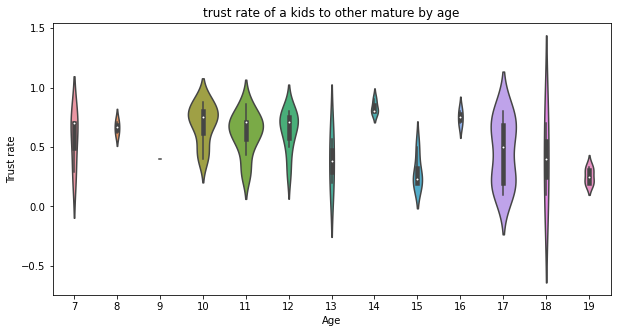

In [695]:
fig , ax = plt.subplots(figsize=(10,5))
sns.violinplot(ax=ax,x=(kid_mature.age_0),y=(kid_mature.P_Trust_rate_0),scale='count')

plt.title('trust rate of a kids to other mature by age')
plt.xlabel('Age')
plt.ylabel('Trust rate')
plt.savefig('kids Trust by gender to other mature by age.png', dpi=400);

#### trust rate of  a  mature to kids

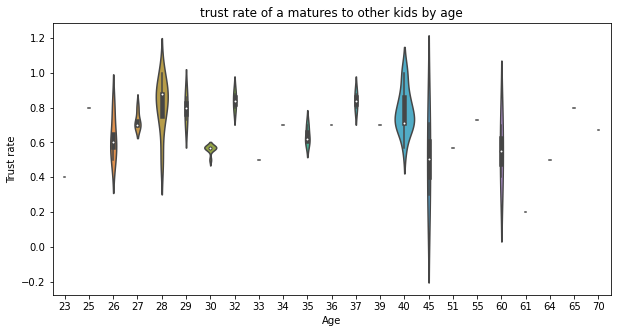

In [514]:
fig , ax = plt.subplots(figsize=(10,5))
sns.violinplot(ax=ax,x=(kid_mature.age_1),y=(kid_mature.P_Trust_rate_1),scale='count')

plt.title('trust rate of a matures to other kids by age')
plt.xlabel('Age')
plt.ylabel('Trust rate');

### trust rate of a kid to others  by relation degree

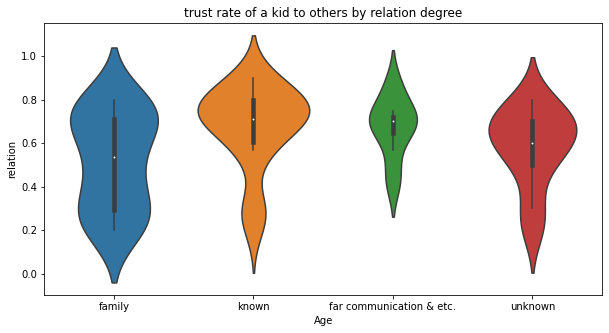

In [515]:
fig , ax = plt.subplots(figsize=(10,5))


sns.violinplot(ax=ax,y=first_kid.P_Trust_rate_0,x=(first_kid.relation_degree),scale='count',order=['family','known','far communication & etc.','unknown'])
plt.title('trust rate of a kid to others by relation degree')
plt.xlabel('Age')
plt.ylabel('relation');

### trust rate by age distance

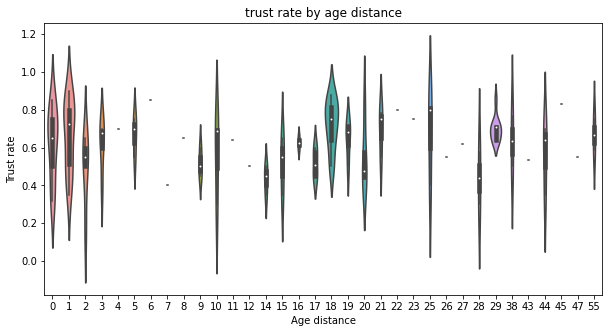

In [516]:
fig , ax = plt.subplots(figsize=(10,5))


sns.violinplot(ax=ax,x=abs(clear_Game_table.age_0-clear_Game_table.age_1),y=(clear_Game_table.P_Trust_rate_0+clear_Game_table.P_Trust_rate_1)/2,scale='count')
plt.title('trust rate by age distance')
plt.xlabel('Age distance')
plt.ylabel('Trust rate');

### Trust of a kid to other by age distance

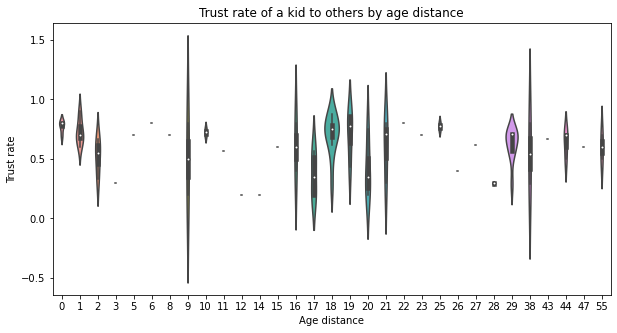

In [517]:
fig , ax = plt.subplots(figsize=(10,5))

sns.violinplot(ax=ax,y=first_kid.P_Trust_rate_0,x=abs(first_kid.age_0-first_kid.age_1),scale='count')
plt.title('Trust rate of a kid to others by age distance')
plt.xlabel('Age distance')
plt.ylabel('Trust rate');

### Trust of a mature to other mature by age distance

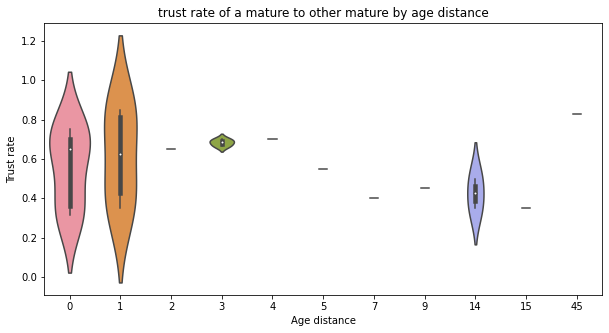

In [518]:
fig , ax = plt.subplots(figsize=(10,5))

sns.violinplot(ax=ax,y=(matures.P_Trust_rate_0+matures.P_Trust_rate_1)/2,x=abs(matures.age_0-matures.age_1),scale='count')

plt.title('trust rate of a mature to other mature by age distance')
plt.xlabel('Age distance')
plt.ylabel('Trust rate');

# Bar plots

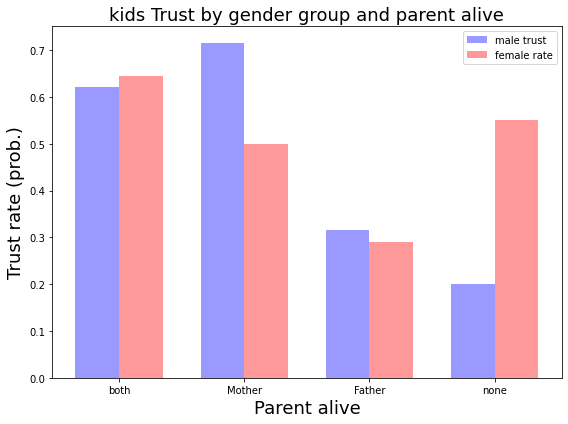

In [520]:
male   = first_kid[first_kid['gender_0']=="M"].groupby(first_kid['parent(F_M)_0'])['P_Trust_rate_0'].mean()
female = first_kid[first_kid['gender_0']=="F"].groupby(first_kid['parent(F_M)_0'])['P_Trust_rate_0'].mean()

fig, ax = plt.subplots(figsize=(8,6))
index = np.arange(4)
bar_width = 0.35
opacity = 0.4
rects1 = plt.bar(index            , [male[11],male[1],male[10],male[0]], bar_width,alpha=opacity,color='b',label='male trust')
rects2 = plt.bar(index + bar_width, [female[11],female[1],female[10],female[0]], bar_width,alpha=opacity,color='r',label='female rate')

plt.xlabel('Parent alive', fontsize=18)
plt.ylabel('Trust rate (prob.)', fontsize=18)
plt.title('kids Trust by gender group and parent alive', fontsize=18)
plt.xticks(index + bar_width / 2, ('both','Mother','Father','none'))
# plt.yticks(list(range(0,110,10)))
plt.legend()
plt.tight_layout()
plt.savefig('kids Trust by gender group and parent alive.png', dpi=400);

# Trust by group and relation degree bar chart Function

### relations degree mean :

- family (deg = 1) => blood relation
- known  (deg = 2) => close friend | close relation but not family => non_blood relation
- far communicate & etc. (deg = 3) => just known each other but dosn't close relation
- unknown (deg = 0 ) => strangers

In [521]:
def gain_rate_trust_plot(gain_trust_bar,trust_rate_bar,title):
    
    n_groups = len(gain_trust_bar.index)
    fig, ax = plt.subplots(figsize=(8,6))
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.4
    rects1 = plt.bar(index, gain_trust_bar*100, bar_width,alpha=opacity,color='b',label='gain trust')
    rects2 = plt.bar(index + bar_width, trust_rate_bar*100, bar_width,alpha=opacity,color='r',label='trust rate')
    
    plt.xlabel('relation', fontsize=18)
    plt.ylabel('Trust ratio (%)', fontsize=18)
    plt.title(f'{title} Trust by group and relation degree', fontsize=18)
    plt.xticks(index + bar_width / 2, ('family','known','far communicate \n & etc.','unknown'))
    plt.yticks(list(range(0,110,10)))
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{title}_trust_rate_groups.png', dpi=400);

##### Calculating  Gain Trust & Trust ratio of Matures :

In [522]:
size_of_group_relation = matures.groupby(matures.relation_degree).size()

gain_trust_each_group_0 = matures[matures['Gain_Trust_0']=='T'].groupby(matures.relation_degree).size()
gain_trust_each_group_1 = matures[matures['Gain_Trust_1']=='T'].groupby(matures.relation_degree).size()
gain_trust_bar = (gain_trust_each_group_0+gain_trust_each_group_1)/(2*size_of_group_relation)

trust_rate_each_group_0 = matures['P_Trust_rate_0'].groupby(matures.relation_degree).sum()
trust_rate_each_group_1 = matures['P_Trust_rate_1'].groupby(matures.relation_degree).sum()
trust_rate_bar = (trust_rate_each_group_0+trust_rate_each_group_1)/(2*size_of_group_relation);

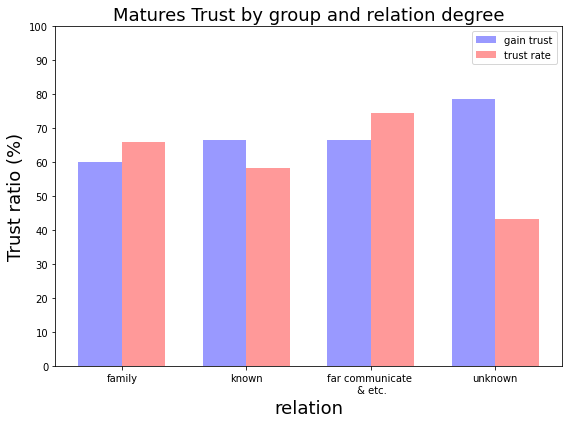

In [523]:
gain_rate_trust_plot(gain_trust_bar,trust_rate_bar,'Matures')

# Export our report as csv file

In [867]:
Game_table.head()

,geme_step,relation_degree,P_id_0,P_move_0,P_tend_0,P_id_1,P_move_1,P_tend_1,age_0,gender_0,job_0,parent(F_M)_0,age_1,gender_1,job_1,parent(F_M)_1
0,10,1,0,CCCTTTCTCC,1,1,TTCTTTTCTT,0,9,M,NaN,11,25,M,student,11
1,6,3,0,CTCTTT,1,4,TCTTTT,1,9,M,NaN,11,10,M,NaN,11
2,10,1,2,CCTTTCCCTC,0,3,CCTCTTTCTC,0,30,M,self employed,10,31,M,housewife,0
3,10,1,4,TTTCTCTTCT,1,5,TTCTTTTTTT,1,10,M,NaN,11,11,F,NaN,11
4,10,1,4,CTCTCTCCTC,1,5,TCCCTTTTT,1,10,M,NaN,11,11,F,NaN,11


In [26]:
Game_table.to_csv('endly.csv',index=False)

# Appendix

In [314]:
# table_rule => (cheat/cheat)(trust/trust)(trust/cheat)(cheat/trust)  *   rewards/ punishment
#
#
#               \          T2                C2
#                \~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#                !          R2= +2   !           R2 = +3   !
#            T1 !                   !                     !
#              !   R1 = +2         !   P1 = -1           !
#             ! ------------------!---------------------!
#            !           p2= -1  !             p2 = 0  !
#       C1  !                   !                     !
#          !   R1 = +3         !    P1 = 0           !
#          ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#
#  ?????????????????????????  
#  ????? Our Questions ????     When peaple Trust to each other and why ?
#  ???????????????????????       Is gender a critical variable for Trust ?
#                                 How kids tr[ust ?
# Descriptive Analysis phase :               > to adult
#                                            >to other kids     (this part by help of some friens for access to kids) 
#                                ----------------------------------------------------------------------------------------
#                                     Is the first action of all humans "Trust" when confront a new person ?
# Predictive Analysis phase :          Is "Attention Bias" related to te Step_movment of each person ?
#                                       chategorize humans by Game_play of them and predict they presonality !!!                          
#
# ---------------------------------------------------------------------------------------------------------------------------
#  We wanna show the tolerance of Trust /causality & correlation betweet Trust & other Table_feature
#    search for confounding Variables /  and a hard work is simulating this trial for kids without changing game rule
#   ------------------------------------------------------------------------------------------------------------------------
#    > The rule of the Game : (cost of punishment & Rewards is different game by game)
#    > R1/R2 : (+1,+1)or(+2,+2)or...
#    > R1/P2 : (+3,-1)or(+)
#    > P1/P2 : (0,0)or(-1,-1,)or...
#    
#    > At first We start with 2 peaple and a supervisor for record the movement and detailing game rule ...
#    > each couple of player are must play 3 games (1'st : has 5_game_step)(2'nd : has 10_game_step)(3'rd : has 20_game_step)
#    > the advantage of primitive sampling is limitation unvanted bias/noise so only 1 player denied to countinoue we have noise.
#    > each player are free to choose his/her competitor maybe knows his/her maybe a random competitor with help of supervisor
#    > because of time limitaton & Covid I (mohammad nili) couldn't develope an application also i was thinking for bias of
#      lost connection therefore i  decide ask some of my psychology_student friends for sampling collection.
#
#  -----------------------------------------------------------------------------------------------------------------------------
#
#     At the end i hope to do it great and have good result for countinue in my thesis.
#     I'll be glade from your editation and Intellectual help
#
#      have a Great time , thanks you.


In [321]:
# appendix : 
#
#        rule : refere to game rule 
#        tend : refere to tention of player to playe more round after the trial.
#        know : refere to prior knowledge of players from each other
#                  > family (deg = 1) => blood relation
#                  > known (deg = 2) => close friend | close relation but not family => non_blood relation
#                  > far communicate & etc. (deg = 3) => just known each other but dosn't close relation
#                  > unknown (deg = 0 ) => strangers
#